In [40]:
import csv
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from graphviz import Source # for drawing decision tree
from IPython.display import SVG # for drawing decision tree
import numpy as np
import pandas

rawData = pandas.read_csv("data/doubleStrandRaw.csv", delimiter=',', skipinitialspace=True, warn_bad_lines=True, index_col=0) 
rawData = rawData.astype('bool') # convert to bools
foreground = rawData.loc[rawData['class'] == True].drop('class', axis = 1) # split into forground and backgorund
background = rawData.loc[rawData['class'] == False].drop('class', axis = 1)
# print(foreground.loc[foreground[rawData.columns[2]] == True])
# print(rawData)

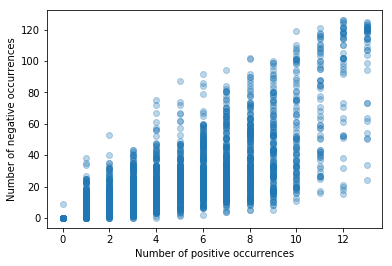

In [41]:
import random

posCounts = foreground.sum(axis=0) #produces list of sum of occurances in foregorund for each column
negCounts = background.sum(axis=0)

# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)))
plt.scatter(posCounts, negCounts, alpha=0.3)
# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)), alpha=0.3)
plt.xlabel("Number of positive occurrences")
plt.ylabel("Number of negative occurrences")
plt.show()

In [42]:
n = len(foreground.columns)
posCoOccur = [0 for x in range(n*n)]
negCoOccur = [0 for x in range(n*n)]

for row in foreground.as_matrix():
    for first in range(n):
        if row[first]:
            for second in range(first+1,n):
                if row[second]:
                    posCoOccur[first*n+second] += 1                      

for row in background.as_matrix():
    for first in range(n):
        if row[first]:
            for second in range(first+1,n):
                if row[second]:
                    negCoOccur[first*n+second] += 1

KeyboardInterrupt: 

In [ ]:
import random
# plt.scatter(list(map(lambda x: x + random.random() -.5, posCounts)), list(map(lambda x: x + random.random() -.5, negCounts)))
# plt.scatter(posCoOccur, negCoOccur, alpha=0.2)
plt.scatter(list(map(lambda x: x + random.random() -.5, posCoOccur)), list(map(lambda x: x + random.random() -.5, negCoOccur)), alpha=0.01)
plt.xlabel("Number of positive co-occurrences")
plt.ylabel("Number of negative co-occurrences")
plt.show()

In [ ]:
import math
print(rawData.columns[math.floor(9999/len(rawData.columns))], " and ", rawData.columns[9999%len(rawData.columns)])

In [56]:
never = []
neverMotifNames = []
mixed = []
mixedMotifNames = []
right = []
rightMotifNames = []
bottom = []
bottomMotifNames = []
ratio = []
ratioMotifNames = []
lasso = []
lassoMotifNames = []
welchList = []
welchListMotifNames = []

posCounts = foreground.sum(axis=0) #produces list of sum of occurances in foregorund for each column
print(max(posCounts))
negCounts = background.sum(axis=0)
for col in range(len(posCounts)):
    if negCounts[col] == 0 and posCounts[col] == 0:
        neverMotifNames.append(rawData.columns[col])
    else:
        if posCounts[col] >= max(posCounts) - 1:
            rightMotifNames.append(rawData.columns[col])
        if negCounts[col] < 3:
            bottomMotifNames.append(rawData.columns[col])
        if posCounts[col] > 0 and negCounts[col] > 0:
            mixedMotifNames.append(rawData.columns[col])
        if (posCounts[col] / max(posCounts)) / (1+negCounts[col]/max(negCounts)) > .5:
            ratioMotifNames.append(rawData.columns[col])
        if posCounts[col] >= 9 and negCounts[col] <= 60:
            welchListMotifNames.append(rawData.columns[col])

13


In [63]:
# calculate and list metrics for all motifs with foreground >= 9 & background <= 20
print('true positives|false positives|true negatives|false negatives|accuracy|Sensitivity|Specificity|True Positive + False Negative|motif name')

selected = rightMotifNames
netTP = 0
netFP = 0
netTN = 0
netFN = 0
for motif in selected:
    tp = foreground.loc[foreground[motif] == True].shape[0]
    fn = foreground.loc[foreground[motif] == False].shape[0]
    tn = background.loc[background[motif] == False].shape[0]
    fp = background.loc[background[motif] == True].shape[0]
    netTP += tp
    netFP += fp
    netTN += tn
    netFN += fn
    if(tn+fp == 0):
        print(tp,"|", fp,"|", tn,"|", fn,"|",(tp+tn)/(tp+tn+fp+fn),"|",tp/(tp+fn),"|", " NA ","|", tp+fn,"|",motif)
    else:
        print(tp,"|", fp,"|", tn,"|", fn,"|",(tp+tn)/(tp+tn+fp+fn),"|",tp/(tp+fn),"|",tn/(tn+fp),"|", tp+fn,"|",motif)

print("AVERAGE / SUM METRICS:")
print('true positives|false positives|true negatives|false negatives|accuracy|Sensitivity|Specificity|True Positive + False Negative')
if(netTN+netFP == 0):
    print(netTP,"|", netFP,"|", netTN,"|", netFN,"|",(netTP+netTN)/(netTP+netTN+netFP+netFN),"|",netTP/(netTP+netFN),"|"," NA ","|", netTP+netFN)
else:
    print(netTP,"|", netFP,"|", netTN,"|", netFN,"|",(netTP+netTN)/(netTP+netTN+netFP+netFN),"|",netTP/(netTP+netFN),"|",netTN/(netTN+netFP),"|", netTP+netFN)

true positives|false positives|true negatives|false negatives|accuracy|Sensitivity|Specificity|True Positive + False Negative|motif name
13 | 64 | 68 | 0 | 0.5586206896551724 | 1.0 | 0.5151515151515151 | 13 | gimme_100_Improbizer_ACGAAAGAGAGAGAAAAG
12 | 18 | 114 | 1 | 0.8689655172413793 | 0.9230769230769231 | 0.8636363636363636 | 13 | gimme_104_Improbizer_GTGCAACGGAGAGT
13 | 73 | 59 | 0 | 0.496551724137931 | 1.0 | 0.44696969696969696 | 13 | gimme_140_MEME_1_w12
13 | 118 | 14 | 0 | 0.18620689655172415 | 1.0 | 0.10606060606060606 | 13 | gimme_141_MEME_2_w12
12 | 102 | 30 | 1 | 0.2896551724137931 | 0.9230769230769231 | 0.22727272727272727 | 13 | gimme_162_Weeder_3
12 | 21 | 111 | 1 | 0.8482758620689655 | 0.9230769230769231 | 0.8409090909090909 | 13 | gimme_146_MEME_7_w12
12 | 71 | 61 | 1 | 0.503448275862069 | 0.9230769230769231 | 0.4621212121212121 | 13 | gimme_150_MEME_1_w14
13 | 62 | 70 | 0 | 0.5724137931034483 | 1.0 | 0.5303030303030303 | 13 | gimme_136_MEME_7_w10
12 | 64 | 68 | 1 | 0.